In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

/Users/standarduser/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/standarduser/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
train = pd.read_csv('train_modified.csv')

In [7]:
target='Disbursed'
IDcol = 'ID'
predictors = [x for x in train.columns if x not in [target, IDcol]]
train[target].value_counts()

0.0    85747
1.0     1273
Name: Disbursed, dtype: int64

In [10]:
clf = GradientBoostingClassifier(random_state=10)

In [12]:
clf.fit(train[predictors], train['Disbursed'])
train_predictions = clf.predict(train[predictors])

In [16]:
train_predprob = clf.predict_proba(train[predictors])[:,1]

In [17]:
train_predprob

array([ 0.00233536,  0.0213857 ,  0.00248245, ...,  0.02531264,
        0.06269165,  0.01661014])

In [18]:
cv_score = cross_validation.cross_val_score(clf, train[predictors], train['Disbursed'], cv=5, scoring='roc_auc')

In [22]:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(train['Disbursed'].values, train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(train['Disbursed'], train_predprob)
print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))


Model Report
Accuracy : 0.9856
AUC Score (Train): 0.864989
CV Score : Mean - 0.7393652 | Std - 0.06878888 | Min - 0.6447302 | Max - 0.823866


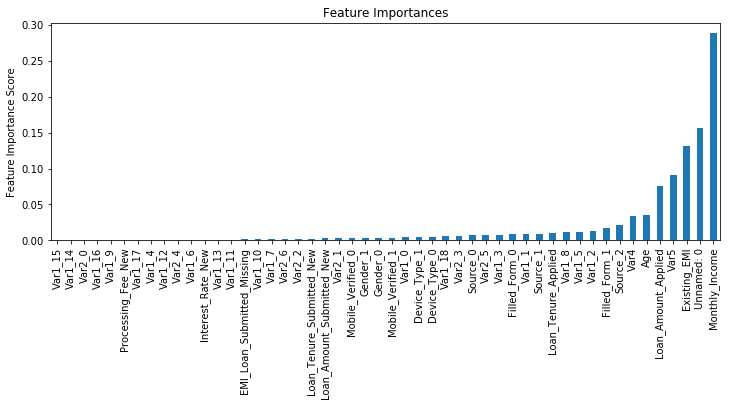

In [25]:
feat_imp = pd.Series(clf.feature_importances_, predictors).sort_values(ascending=True)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [28]:
param_test1 = {'n_estimators':range(20,81,10)}

In [33]:
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,
                                  min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=50,
              min_samples_split=500, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [20, 30, 40, 50, 60, 70, 80]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [34]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.78913, std: 0.03307, params: {'n_estimators': 20},
  mean: 0.79349, std: 0.03562, params: {'n_estimators': 30},
  mean: 0.79584, std: 0.03355, params: {'n_estimators': 40},
  mean: 0.78826, std: 0.03767, params: {'n_estimators': 50},
  mean: 0.78333, std: 0.04045, params: {'n_estimators': 60},
  mean: 0.78347, std: 0.03852, params: {'n_estimators': 70},
  mean: 0.77928, std: 0.04139, params: {'n_estimators': 80}],
 {'n_estimators': 40},
 0.7958390838040519)